<a href="https://colab.research.google.com/github/lucyzandile/unsupervised-predict-streamlit-template/blob/master/coclustering_model_pics_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://drive.google.com/uc?id=14u6UCXwx0cdylJiJSDgnjOwJMy7wSUNM

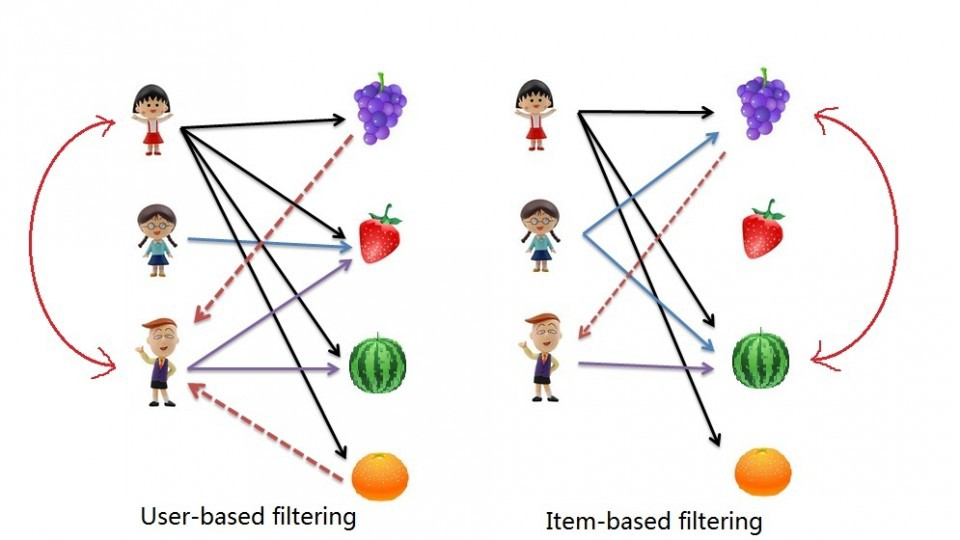

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

C-clustering notebook

In [ ]:
pip install scikit-surprise

pip install scikit-surprise

In [ ]:
# data analysis libraries
import pandas as pd
import numpy as np

# visualisation libraries
from matplotlib import pyplot as plt
import seaborn as sns
from numpy.random import RandomState


# Notebook styling
%matplotlib inline
sns.set()


# ML Models
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy

# ML Pre processing
from surprise.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Hyperparameter tuning
from surprise.model_selection import GridSearchCV

# High performance hyperparameter tuning
#from tune_sklearn import TuneSearchCV
#import warnings
#warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
movies = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/movies.csv")

In [ ]:
df = train.copy()

In [ ]:
#create a copy of the train data
df_train = train.copy()

#display top 5 records
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [ ]:
# Find the length of the unique use
len(df_train['userId'].unique()), len(df_train['movieId'].unique())

(162541, 48213)

In [ ]:
# Merge
df_merge1 = train.merge(movies, on = 'movieId')
df_merge1.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [ ]:
# Loading as Surprise dataframe 
reader = Reader()
data = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)

In [ ]:
# Data split 85/15
trainset, testset = train_test_split(data, test_size=0.15)

In [ ]:
co_clust = CoClustering()

In [ ]:
# Fitting our trainset
co_clust.fit(trainset)

# Using the 15% testset to make predictions
predictions = co_clust.test(testset) 
predictions

test = pd.DataFrame(predictions)

In [ ]:
# View the head
test.head()

,uid,iid,r_ui,est,details
0,12085,95441,4.0,3.396523,{'was_impossible': False}
1,12552,1661,4.0,3.740503,{'was_impossible': False}
2,145118,2918,2.0,3.254426,{'was_impossible': False}
3,15121,1022,4.0,3.256206,{'was_impossible': False}
4,39330,236,3.0,3.299837,{'was_impossible': False}


In [ ]:
# We are trying to predict ratings for every userId / movieId pair, we implement the below list comprehension to achieve this.
ratings_predictions=[co_clust.predict(row.uid, row.iid) for _,row in test.iterrows()]
ratings_predictions

[Prediction(uid=12085, iid=95441, r_ui=None, est=3.396523341996487, details={'was_impossible': False}),
 Prediction(uid=12552, iid=1661, r_ui=None, est=3.740502957861223, details={'was_impossible': False}),
 Prediction(uid=145118, iid=2918, r_ui=None, est=3.2544263766783454, details={'was_impossible': False}),
 Prediction(uid=15121, iid=1022, r_ui=None, est=3.2562060067183114, details={'was_impossible': False}),
 Prediction(uid=39330, iid=236, r_ui=None, est=3.2998370045420233, details={'was_impossible': False}),
 Prediction(uid=103611, iid=1729, r_ui=None, est=2.9614083265739555, details={'was_impossible': False}),
 Prediction(uid=151102, iid=45672, r_ui=None, est=1.741741488246189, details={'was_impossible': False}),
 Prediction(uid=159515, iid=5669, r_ui=None, est=3.186450602702322, details={'was_impossible': False}),
 Prediction(uid=145350, iid=91542, r_ui=None, est=3.5767436839035756, details={'was_impossible': False}),
 Prediction(uid=3547, iid=5010, r_ui=None, est=3.445213885236

In [ ]:
# Converting our prediction into a familiar format-Dataframe
df_pred=pd.DataFrame(ratings_predictions)
df_pred

,uid,iid,r_ui,est,details
0,12085,95441,None,3.396523,{'was_impossible': False}
1,12552,1661,None,3.740503,{'was_impossible': False}
2,145118,2918,None,3.254426,{'was_impossible': False}
3,15121,1022,None,3.256206,{'was_impossible': False}
4,39330,236,None,3.299837,{'was_impossible': False}
...,...,...,...,...,...
1500001,9867,824,None,4.315303,{'was_impossible': False}
1500002,100952,6564,None,3.334915,{'was_impossible': False}
1500003,72315,130698,None,3.533668,{'was_impossible': False}
1500004,123148,8950,None,3.852320,{'was_impossible': False}


In [ ]:
# Renaming our predictions to original names
df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
df_pred.drop(['r_ui','details'],axis=1,inplace=True)

In [ ]:
# Snippet of our ratings
df_pred.head()

,userId,movieId,rating
0,12085,95441,3.396523
1,12552,1661,3.740503
2,145118,2918,3.254426
3,15121,1022,3.256206
4,39330,236,3.299837


In [ ]:
# Concatenating userId/movieId into a single Id column.(code has to be run twice to get desired outcome)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)


KeyError: ignored

In [ ]:
# drop the two features from the dataset userId and movieId
df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)

KeyError: ignored

In [ ]:
df_pred.to_csv("coClustering_model_base.csv", index=False)

co clustering produces a score of 1.18